In [1]:
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd
from sklearn.datasets import load_iris
#Loading data
iris = load_iris()

#Converting to pandas dataframe
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['target'] = iris.target
df.tail()

#Creating X independent variable dataframe and y dependent variable dataframe
X = df.iloc[:,:-1].values
y = df.iloc[:,4].values

#Splitting dataset into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=41)
from sklearn.preprocessing import StandardScaler

#Scaling of dataset
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

#Creating an instance of Kneighbors classifier
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=5)
clf.fit(X_train, y_train)

#Predicting the output with the help of test
y_pred = clf.predict(X_test)

#Evaluating the model
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       0.83      0.91      0.87        11
           2       0.89      0.80      0.84        10

    accuracy                           0.90        30
   macro avg       0.91      0.90      0.90        30
weighted avg       0.90      0.90      0.90        30

[[ 9  0  0]
 [ 0 10  1]
 [ 0  2  8]]


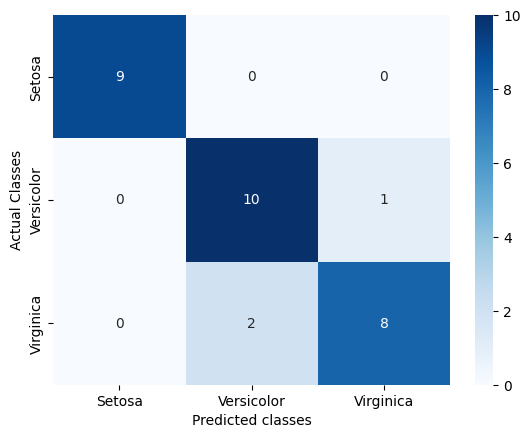

In [8]:
Confusion_mat = confusion_matrix(y_test, y_pred)
import seaborn as sns

sns.heatmap(Confusion_mat, cmap='Blues', annot=True)
plt.xticks(np.arange(3)+0.5, ['Setosa','Versicolor','Virginica'])
plt.yticks(np.arange(3)+0.5, ['Setosa','Versicolor','Virginica'])
plt.xlabel('Predicted classes')
plt.ylabel('Actual Classes')
plt.show()